# CS 109A/AC 209A/STAT 121A Data Science: Homework 3 (Solutions)
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 28th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW3.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import statsmodels.api as sm
import scipy as sp
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Last, First]

### Part (b): Course Number

[CS 109a or STATS 121a or AC 209a]

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Multiple linear regression

### Part (a): Implement multiple linear regression from scratch

You are provided a data set containing attributes related to automobiles as well as their corresponding prices. The task is to build a linear regression model from scratch that can estimate the price of an automobile (response variable) using its attributes (predictor variables).

The file ``dataset_1_train.txt`` contains the training set that you can use to fit a regression model, and the file ``dataset_1_test.txt`` contains the test set that you can use to evaluate the model. In each file, the first two columns contain the predictors of the automobile, namely ``'horsepower'`` and ``'highway MPG'``, and the last column contains the automobile prices.

- Implement the following two functions from scratch. 

    - ``multiple_linear_regression_fit``:

        - takes as input: the training set, ``x_train``, ``y_train``

        - fits a multiple linear regression model

        - returns the model parameters (coefficients on the predictors, as an array, and the intercept, as a float).

    - ``multiple_linear_regression_score``:

        - takes model parameters (coefficients and intercept) and the test set, ``x_test`` ``y_test``, as inputs

        - returns the R^2 score for the model on the test set, along with the predicted y-values.
        
- Use your functions to predict automobile prices and evaluate your predictions.

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

**Solution:**

In [3]:
### Functions for fitting and evaluating multiple linear regression

#--------  multiple_linear_regression_fit
# A function for fitting a multiple linear regression
# Fitted model: f(x) = x.w + c
# Input: 
#      x_train (n x d array of predictors in training data)
#      y_train (n x 1 array of response variable vals in training data)
# Return: 
#      w (d x 1 array of coefficients) 
#      c (float representing intercept)

def multiple_linear_regression_fit(x_train, y_train):
    
    # Append a column of one's to x
    n = x_train.shape[0]
    ones_col = np.ones((n, 1))
    x_train = np.concatenate((x_train, ones_col), axis=1)
    
    # Compute transpose of x
    x_transpose = np.transpose(x_train)
    
    # Compute coefficients: w = inv(x^T * x) x^T * y
    # Compute intermediate term: inv(x^T * x)
    # Note: We have to take pseudo-inverse (pinv), just in case x^T * x is not invertible 
    x_t_x_inv = np.linalg.pinv(np.dot(x_transpose, x_train))
    
    # Compute w: inter_term * x^T * y 
    w = np.dot(np.dot(x_t_x_inv, x_transpose), y_train)
    
    # Obtain intercept: 'c' (last index)
    c = w[-1]
    
    return w[:-1], c

#--------  multiple_linear_regression_score
# A function for evaluating R^2 score and MSE 
# of the linear regression model on a data set
# Input: 
#      w (d x 1 array of coefficients)
#      c (float representing intercept)
#      x_test (n x d array of predictors in testing data)
#      y_test (n x 1 array of response variable vals in testing data)
# Return: 
#      r_squared (float) 
#      y_pred (n x 1 array of predicted y-vals)

def multiple_linear_regression_score(w, c, x_test, y_test):        
    # Compute predicted labels
    y_pred = np.dot(x_test, w) + c
    
    # Evaluate sqaured error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1 - sq_error / y_variance

    return r_squared, y_pred

In [3]:
# Load train and test data sets
data_train = np.loadtxt('datasets/dataset_1_train.txt', delimiter=',', skiprows=1)
data_test = np.loadtxt('datasets/dataset_1_test.txt', delimiter=',', skiprows=1)

# Split predictors from response
# Training
y_train = data_train[:, -1]
x_train = data_train[:, :-1]

# Testing
y_test = data_test[:, -1]
x_test = data_test[:, :-1]

# Fit multiple linear regression model
w, c = multiple_linear_regression_fit(x_train, y_train)

# Evaluate model
r_squared, _ = multiple_linear_regression_score(w, c, x_test, y_test)

print 'R^2 score on test set:', r_squared

R^2 score on test set: 0.177944627327


### Part (b): Confidence interval on regression parameters
Using your linear regression implementation from Part (a), model the data in ``dataset_2.txt``, which contains five predictor variables in the first five columns, and the response variable in the last column.

Compute confidence intervals for the model parameters you obtain:

- Create 200 random subsamples of the data set of size 100, and use your function to fit a multiple linear regression model to each subsample. 

- For each coefficient on the predictor variables: plot a histogram of the values obtained across the subsamples, and calculate the confidence interval for the coefficients at a confidence level of 95%. 

- Highlight the mean coeffcient values and the end points of the confidence intervals using vertical lines on the histogram plot. How large is the spread of the coefficient values in the histograms, and how tight are the confidence intervals?

- Use the formula for computing confidence intervals provided in class (or use ``statmodels``) to compute the the confidence intervals. Compare confidence intervals you find through simulation to the ones given by the formula (or ``statmodels``), are your results what you would expect?

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

**Solution:**

Linear regression with all predictors


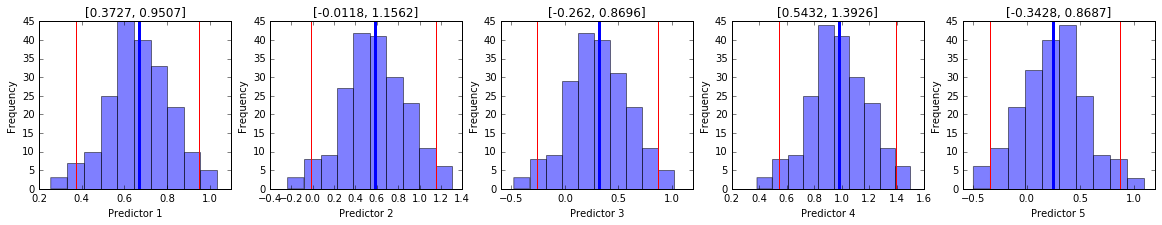

In [4]:
# Load train set
data = np.loadtxt("datasets/dataset_2.txt", delimiter=',', skiprows = 1)

# Size of data set, and subsample (10%)
x = data[:, :-1]
y = data[:, -1]

# Record size of the data set
n = x.shape[0]
d = x.shape[1]
subsample_size = 100

# No. of subsamples
num_samples = 200
    
### Linear regression with all 5 predictors

# Create a n x d array to store coefficients for 100 subsamples
coefs_multiple = np.zeros((num_samples, d))

print 'Linear regression with all predictors'

# Repeat for 200 subsamples
for i in range(num_samples):
    # Generate a random subsample of 50 data points
    perm = np.random.permutation(n) # Generate a list of indices 0 to n and permute it
    x_subsample = x[perm[:subsample_size], :] # Get x-vals for the first 50 indices in permuted list
    
    y_subsample = y[perm[:subsample_size]] # Get y-vals for the first 50 indices in permuted list

    # Fit linear regression model on subsample
    w, c = multiple_linear_regression_fit(x_subsample, y_subsample)
    # Store the coefficient for the model we obtain
    coefs_multiple[i, :] = w

# Plot histogram of coefficients, and report their confidence intervals 
fig, axes = plt.subplots(1, d, figsize=(20, 3))

# Repeat for each coefficient
for j in range(d):
    # Compute mean for the j-th coefficent from subsamples
    coef_j_mean = np.mean(coefs_multiple[:, j])
    
    # Compute confidence interval at 95% confidence level (use formula!)
    conf_int_left = np.percentile(coefs_multiple[:, j], 2.5)
    conf_int_right = np.percentile(coefs_multiple[:, j], 97.5)
       
    # Plot histogram of coefficient values
    axes[j].hist(coefs_multiple[:, j], alpha=0.5)

    # Plot vertical lines at mean and left, right extremes of confidence interval
    axes[j].axvline(x = coef_j_mean, linewidth=3)
    axes[j].axvline(x = conf_int_left, linewidth=1, c='r')
    axes[j].axvline(x = conf_int_right, linewidth=1, c='r')
    
    # Set plot labels
    axes[j].set_title('[' + str(round(conf_int_left, 4)) 
                      + ', ' 
                      + str(round(conf_int_right, 4)) + ']')
    axes[j].set_xlabel('Predictor ' + str(j + 1))
    axes[j].set_ylabel('Frequency')

plt.show()


In [5]:
# Add column of ones to x matrix
x = sm.add_constant(x)

# Create model for linear regression
model = sm.OLS(y, x)
# Fit model
fitted_model = model.fit()
# The confidence intervals for our five coefficients are contained in the last five
# rows of the fitted_model.conf_int() array
conf_int = fitted_model.conf_int()[1:, :]

for j in range(d):
    print 'the confidence interval for the', j, 'th coefficient: [', conf_int[j][0], ',', conf_int[j][1], ']'

the confidence interval for the 0 th coefficient: [ 0.552772624515 , 0.75038508161 ]
the confidence interval for the 1 th coefficient: [ 0.352230409656 , 0.749743369436 ]
the confidence interval for the 2 th coefficient: [ 0.0889138463555 , 0.47338926001 ]
the confidence interval for the 3 th coefficient: [ 0.809809940402 , 1.09854837094 ]
the confidence interval for the 4 th coefficient: [ 0.0785426153804 , 0.488433606409 ]


The confidence interval for the coefficients given above are tighter than the ones we obtain through subsampling. This is because in each subsample we are only using 100 data points, thus, our estimates of the parameters will vary greatly across subsamples (leading to larger standard error and hence wider confidence intervals). When we compute the confidence interval in the above, we naively used the entire dataset! In order for the confidence intervals generated from the formula (or from ``statsmodels``) to match those from our simulation, we must scale the formula to take into account the difference between the size of the subsamples and that of the entire dataset!

## Problem 2: Polynomial regression
In this problem, we revisit a dataset from Homework 1 and fit polynomial regression models to it. The dataset is provided in the file ``dataset_3.txt``, which contains a single predictor variable ``x`` in the first column and the response variable ``y`` in the second column. 

### Part(a): Implement polynomial regression from scratch

- Implement the following three functions from scratch:

    - ``polynomial_regression_fit``:
        - takes as input: training set, ``x_train``, ``y_train`` and the degree of the polynomial
        - fits a polynomial regression model 
        - returns the model parameters (array of coefficients and the intercept)

    - ``polynomial_regression_predict``: 
        - takes as input: the model parameters (array of coefficients and the intercept), the degree of the polynomial and the test set predictors ``x_test``
        - returns the response values predicted by the model on the test set. 

    - ``polynomial_regression_score``: 
        - takes an array of predicted response values and the array of true response values ``y_test``
        - returns R^2 score for the model on the test set, as well as the sum of squared errors

- Fit polynomial regression models of degrees 3, 5, 10 and 25 to the data set. Visualize the original data along with the fitted models for the various degrees in the same plot. 

For this problem, you may either use the multiple linear regression functions implemented in the Problem 1 or use the in-built functions in ``sklearn``.

**Solution:**

In [8]:
#--------  polynomial_regression_fit
# Input: 
#      x_train (n x d array of predictors in training data)
#      y_train (n x 1 array of response variable vals in training data)
#      degree (integer)
# Return: 
#      w (d x 1 array of coefficients) 
#      c (float representing intercept)
def polynomial_regression_fit(x_train, y_train, degree):
    
    # Expand the array for x with columns for x^2, x^3, etc 
    # so that x_expanded is of size n x degree
    n = x_train.shape[0]
    x_expanded = np.zeros([n, degree])
    for d in range(1, degree + 1):
        x_expanded[:, d - 1] = np.power(x_train, d)
        
    # Fit regression model on expanded feature space
    # Using our functions from Problem 1:
    # w, c = multiple_linear_regression_fit(x_expanded, y_train)
    
    # Fit sklearn multiple linear regression model
    reg = Lin_Reg()
    reg.fit(x_expanded, y_train)
    
    # Get coefficients from fitted model
    w = reg.coef_
    c = reg.intercept_
    
    return w, c

#--------  polynomial_regression_predict
# Input: 
#      w (d x 1 array of coefficients) 
#      c (float representing intercept)
#      degree (integer)
#      x_test (n x d array of predictors in testing data)
# Return: 
#      y_pred (n x 1 array of predicted y-vals) 
def polynomial_regression_predict(w, c, degree, x_test):

    # Expand the array for x with columns for x^2, x^3, etc 
    # so that x_expanded is of size n x degree
    n = x_test.shape[0]
    x_expanded = np.zeros([n, degree])
    for d in range(1, degree + 1):
        x_expanded[:, d - 1] = np.power(x_test, d)
        
    # Predict y-vals
    y_pred = np.dot(x_expanded, w) + c
        
    return y_pred

#--------  polynomial_regression_score
# Input: 
#      y_pred (n x 1 array of predicted y-vals) 
#      y_test (n x 1 array of actual y-vals) 
# Return: 
#      r_squared (float) 

def polynomial_regression_score(y_pred, y_test):
    # Input: 
    #      Model: w, c
    #      Degree: degree    
    #      Features: x (n x d)
    #      Labels: y (n x 1)
    # Output: 
    #      R^2 score
    
    # Evaluate sqaured error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1 - sq_error / y_variance

    return r_squared, sq_error

In [9]:
#--------  fit_and_plot_polynomial
# Input: 
#      ax (axes)
#      x (n x d array of x-vals) 
#      y (n x 1 array of y-vals) 
#      degree (int)
#      color (str or tuple)
# Return: 
#      ax (axes)

def fit_and_plot_polynomial(ax, x, y, degree, color):
    
    # Fit polynomial model
    w, c = polynomial_regression_fit(x, y, degree)

    # Predict using fitted model
    x_sorted = np.sort(x) # So the x-axis is ordered, crucial for plotting!
    y_pred = polynomial_regression_predict(w, c, degree, x_sorted)
    
    # Plot predicted y-vals
    legend_label = 'Degree = ' + str(degree)
    ax.plot(x_sorted, y_pred, label=legend_label, c=color, linewidth=3.0)
    
    return ax

In [9]:
def polynomial_regression_fit(x, y, degrees):
    # Create the poly terms for x,x^2 .. 
    n= np.size(y)   # data size 
    x_poly = np.zeros([n, degrees]) # poly degree 
    ones_col = np.ones((n, 1))
    print ones_col.shape
    
    for d in range(1, degrees + 1):
        x_poly[:, d - 1] = np.power(x, d) # adding terms 
    print x_poly.shape
    test = np.concatenate((x_poly, ones_col), axis=1)
    
# Load dataset_2
data = np.loadtxt('datasets/dataset_3.txt', delimiter=',', skiprows=1)
x = data[:, 0]
y = data[:, 1]

polynomial_regression_fit(x, y, 2)

(100, 1)
(100, 2)


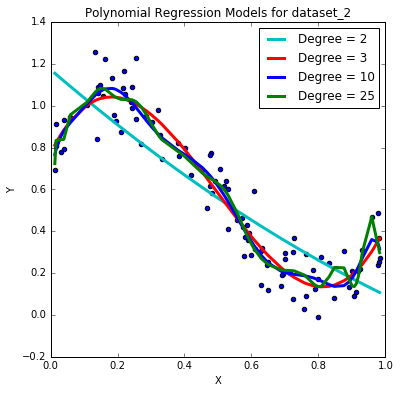

In [11]:
# Make a list of degree for polynomial regresion
degrees = [2, 3, 10, 25]
colors = ['c', 'r', 'b', 'g']


# Load dataset_2
data = np.loadtxt('datasets/dataset_3.txt', delimiter=',', skiprows=1)
x = data[:, 0]
y = data[:, 1]

# Plot data
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(x, y)

for i in range(len(degrees)):       
    # Fit model and plot predicted y-vals
    ax = fit_and_plot_polynomial(ax, x, y, degrees[i], colors[i]) 

# Set x, y labels, legend and title
ax.set_xlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Polynomial Regression Models for dataset_2')
ax.legend(loc='best')

plt.show()

###  Part (b): Comparing training and test errors

- Split the data set in Problem 2 each into training and test sets: use the first 50% of the data for training and the remaining for testing. 


- Fit polynomial models of varying degree ranging from 1 to 15 to the training sets. Evaluate  the various fits on **both** the training and the test sets. Plot both the R^2 score of the fitted polynomial models on the training and test sets as a functions of the degree. 


- Describe the relationship between degree of the polynomial model and the fit on both the training and testing data. Explain, based on the plot, what is the best polynomial model for the data.

**Solution:**

In [13]:
#--------  fit_degrees_and_plot
# Input: 
#      ax (axes)
#      x_train (n x d array of x-vals) 
#      y_train (n x 1 array of y-vals) 
#      x_test (n x d array of x-vals) 
#      y_test (n x 1 array of y-vals) 
#      n_degrees (int)
# Return: 
#      ax (axes)
#      best_deg (degree corresponding to best fit for testing data)
#      r_sq_max (max R^2 val on testing data)

def fit_degrees_and_plot(ax, x_train, y_train, x_test, y_test, n_degrees): 
    # Store train R^2 score values for different degrees
    r_squared_train = np.zeros(n_degrees) 
    
    # Store test R^2 score values for different degrees
    r_squared_test = np.zeros(n_degrees) 
    
    # Iterate over degrees
    for degree in range(1, n_degrees+1):
        # Fit polynomial model on training set
        w, c = polynomial_regression_fit(x_train, y_train, degree)
        
        # Evaluate model on training set
        y_pred = polynomial_regression_predict(w, c, degree, x_train)
        r_squared_train[degree - 1], _ = polynomial_regression_score(y_pred, y_train)
        
        # Evaluate model on test set
        y_pred = polynomial_regression_predict(w, c, degree, x_test)
        r_squared_test[degree - 1], _ = polynomial_regression_score(y_pred, y_test)
    
    ax.plot(np.arange(1,n_degrees + 1), r_squared_train, 'x-', label='Train') 
    ax.plot(np.arange(1,n_degrees + 1), r_squared_test, 'rx-', label='Test') 

    ax.set_xlabel('Degree of Polynomial')
    ax.set_ylabel('R^2 score')
    
    ax.legend(loc='lower right')
    
    best_deg = np.argmax(r_squared_test) + 1
    r_sq_max = max(r_squared_test)
    
    return ax, best_deg, r_sq_max

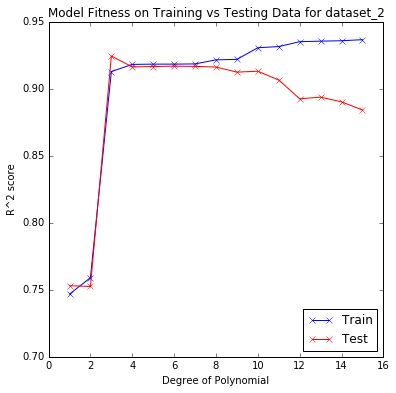

Best fit on test set at 3
Max R^2 score on test set 0.92


In [13]:
# Load dataset_2
data = np.loadtxt('datasets/dataset_3.txt', delimiter=',', skiprows = 1)

# No. of training points
n = data.shape[0]
n_train = int(n * 0.5)

# First 50% train, remaining test
x_train = data[0:n_train, 0]
y_train = data[0:n_train, 1]

x_test = data[n_train:, 0]
y_test = data[n_train:, 1]


# Fit and plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax, best_deg, r_sq_max = fit_degrees_and_plot(ax, x_train, y_train, x_test, y_test, 15)
plt.title('Model Fitness on Training vs Testing Data for dataset_2')
plt.show()

# Observations from plot
print 'Best fit on test set at', best_deg
print 'Max R^2 score on test set', round(r_sq_max, 2)

**Observation:** Increase in polynomial degree improves train accuracy, but does not necessarily improve test accuracy as we begin to overfit the training set.

## Problem 3: Model selection criterion
In this problem, we examine various criteria that help us decide how to choose between multiple models for the same data.

###  Part (a): How does one choose the best polynomial degree?
In Problem 2, you fitted polynomials of different degrees to the entire data set, and inspected the quality of fits on the test set. In practice, one needs to find the 'best' model for the given prediction task using **only** the training set. For this, we'll now make use of two model selection criteria, namely, the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These are evaluated on the training set, but serve as a proxy for the test set accuracy.

For ``dataset_3.txt``, do the following:

- For each polynomial model you fitted, compute the AIC and BIC for the model on the training set. Plot the criterion values as a function of the polynomial degree.


- Which model is chosen by each criterion? Do they match with the model that yields maximum test R^2 score?

**Solution:**

In [11]:
#--------  fit_degrees_aic_bic
# Input: 
#      ax (axes)
#      x_train (n x d array of x-vals) 
#      y_train (n x 1 array of y-vals) 
#      x_test (n x d array of x-vals) 
#      y_test (n x 1 array of y-vals) 
#      n_degrees (int)
# Return: 
#      ax (axes)
def fit_degrees_aic_bic(ax, x_train, y_train, x_test, y_test, n_degrees):

    # Store aic, bic, train and test R^2 score
    aic = np.zeros(n_degrees)
    bic = np.zeros(n_degrees)
    train_r_squared = np.zeros(n_degrees)
    test_r_squared = np.zeros(n_degrees)

    # Iterate over degrees 1 to n_degrees
    for degree in range(1, n_degrees+1):
        
        # Fit polynomial model of degree 'degree' on training set
        w, c = polynomial_regression_fit(x_train, y_train, degree)
        
        # Evaluate model on training set
        y_pred = polynomial_regression_predict(w, c, degree, x_train)
        train_r_squared[degree - 1], train_sq_error = polynomial_regression_score(y_pred, 
                                                                                  y_train)
        
        # Evaluate model on test set
        y_pred = polynomial_regression_predict(w, c, degree, x_test)
        test_r_squared[degree - 1], _ = polynomial_regression_score(y_pred, y_test)

        # Compute AIC and BIC on training set
        aic[degree-1] = n_train * np.log(train_sq_error) + 2 * (degree + 1)
        bic[degree-1] = n_train * np.log(train_sq_error) + (degree + 1) * np.log(n_train)

    # Plot AIC and BIC
    ax.plot(np.arange(1,n_degrees+1), aic, label='AIC')
    ax.plot(np.arange(1,n_degrees+1), bic, 'r', label='BIC')
    ax.set_xlabel('Degree of polynomial')
    ax.set_ylabel('Criterion')
    ax.legend(loc='upper left')

    # Observation from plot
    aic_min_degree = np.argmin(aic) + 1
    bic_min_degree = np.argmin(bic) + 1
    r_sq_max_degree = np.argmax(test_r_squared) + 1
    r_sq_max = max(test_r_squared)
    
    print 'AIC is minimized at degree', \
    aic_min_degree + 1, \
    'and yields test R^2 score', \
    round(test_r_squared[aic_min_degree], 5)
        
    print 'BIC is minimized at degree', \
    bic_min_degree + 1, \
    'and yields test R^2 score', \
    round(test_r_squared[bic_min_degree], 5)
    
    print 'Test R^2 score is maximum at degree', \
    r_sq_max_degree + 1, \
    'and yields test R^2 score', \
    round(r_sq_max, 5)
    
    return ax

AIC is minimized at degree 5 and yields test R^2 score 0.91675
BIC is minimized at degree 4 and yields test R^2 score 0.91648
Test R^2 score is maximum at degree 4 and yields test R^2 score 0.92461


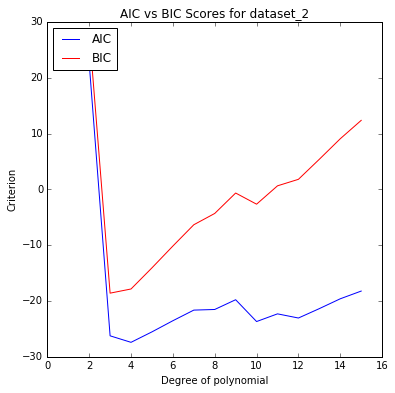

In [15]:
# Load dataset_2
data = np.loadtxt('datasets/dataset_3.txt', delimiter=',', skiprows = 1)

# No. of training points
n = data.shape[0]
n_train = int(n * 0.5)

# First 25% train, remaining test
x_train = data[0:n_train, 0]
y_train = data[0:n_train, 1]

x_test = data[n_train:, 0]
y_test = data[n_train:, 1]

# Call wrapper function
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = fit_degrees_aic_bic(ax, x_train, y_train, x_test, y_test, 15)
plt.title('AIC vs BIC Scores for dataset_2')
plt.show()

**Observation:** The degree prescribed by the model selection criteria are close to the best fit on the test set

### Part (b): Application to New York taxi cab density estimation

We shall now apply the concepts learned so far to a real-world prediction task. You are asked to build a regression model for estimating the density of Green cab taxis at any given time of a day in New York city. The model needs to take the time of the day (in minutes) as input, and predict the expected number of pick ups at that time.

The data set for this problem can be downloaded from the following URL: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv. The file contains the details of all pickups by Green cabs in New York City during January 2015. 

In [26]:
##
## STEP1: DATA EXTRACTION & VISUALIZATION
## LOAD DATA, EXTRACT RELEVANT predictor, PLOT Y vs. X
##

# Dowload data set from URL and save to disk
# Load full set from disk
data = pd.read_csv('green_tripdata_2015-01.csv')
data.head(n=3)

VendorID lpep_pickup_datetime  \
2 2015-01-01 00:34:42  2015-01-01 00:38:34                    N   
  2015-01-01 00:34:46  2015-01-01 00:47:23                    N   
1 2015-01-01 00:34:44  2015-01-01 00:38:15                    N   

                       Lpep_dropoff_datetime  Store_and_fwd_flag  RateCodeID  \
2 2015-01-01 00:34:42                      1          -73.922592   40.754528   
  2015-01-01 00:34:46                      1          -73.952751   40.677711   
1 2015-01-01 00:34:44                      1          -73.843010   40.719055   

                       Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
2 2015-01-01 00:34:42        -73.913635        40.765522                  1   
  2015-01-01 00:34:46        -73.981529        40.658978                  1   
1 2015-01-01 00:34:44        -73.846581        40.711567                  1   

                       Dropoff_latitude  Passenger_count     ...      \
2 2015-01-01 00:34:42              0.88                5     ...       
  2015-01-01 00:34:46              3.08               12     ...       
1 2015-01-01 00:34:44              0.90                5     ...       

                       Fare_amount  Extra  MTA_tax  Tip_amount  Tolls_amount  \
2 2015-01-01 00:34:42          0.5    0.0        0         NaN           0.3   
  2015-01-01 00:34:46          0.5    0.0        0         NaN           0.3   
1 2015-01-01 00:34:44          0.5    1.8        0         NaN           0.0   

                       Ehail_fee  improvement_surcharge  Total_amount  \
2 2015-01-01 00:34:42        6.3                      2             1   
  2015-01-01 00:34:46       13.3                      2             1   
1 2015-01-01 00:34:44        7.8                      1             1   

                       Payment_type  Trip_type   
2 2015-01-01 00:34:42           NaN         NaN  
  2015-01-01 00:34:46           NaN         NaN  
1 2015-01-01 00:34:44           NaN         NaN  

[3 rows x 21 columns]

It looks like the information we want (the time of day of the pickup) is in the first column and it's being **incorrectly** labeled as "VendorID". This indicates that the csv file is **malformed** (typically b/c each line ends with a delimiter, ',') causing pandas to use a column of values as row labels. You can get around this by setting some specialized parameters in the `read_csv` function (e.g. `index_col`) or you can just extract the information we want directly from the mislabeled column (be aware that doing this exposes you to the risk that values appearing in this column might be there as a result of `pandas` misreading the csv file!).

Let's extract the value from the "VendorID" column.

In [27]:
datetime = data['VendorID'].values

print datetime[:10]

['2015-01-01 00:38:34' '2015-01-01 00:47:23' '2015-01-01 00:38:15'
 '2015-01-01 00:38:08' '2015-01-01 01:09:10' '2015-01-01 00:40:58'
 '2015-01-01 00:53:10' '2015-01-01 00:35:08' '2015-01-01 00:41:04'
 '2015-01-01 00:42:39']


Let's now read the csv file correctly and extract the time stamp values.

In [30]:
data = pd.read_csv('green_tripdata_2015-01.csv', usecols=range(0, 21), index_col=False)
data.head(n=3)

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-01-01 00:34:42,2015-01-01 00:38:34,N,1,-73.922592,40.754528,-73.913635,40.765522,1,...,5,0.5,0.5,0.0,0,NaN,0.3,6.3,2,1
1,2,2015-01-01 00:34:46,2015-01-01 00:47:23,N,1,-73.952751,40.677711,-73.981529,40.658978,1,...,12,0.5,0.5,0.0,0,NaN,0.3,13.3,2,1
2,1,2015-01-01 00:34:44,2015-01-01 00:38:15,N,1,-73.843010,40.719055,-73.846581,40.711567,1,...,5,0.5,0.5,1.8,0,NaN,0.0,7.8,1,1


In [31]:
datetime = data['lpep_pickup_datetime'].values

print datetime[:10]

['2015-01-01 00:34:42' '2015-01-01 00:34:46' '2015-01-01 00:34:44'
 '2015-01-01 00:34:48' '2015-01-01 00:34:53' '2015-01-01 00:34:55'
 '2015-01-01 00:34:49' '2015-01-01 00:35:03' '2015-01-01 00:35:13'
 '2015-01-01 00:35:09']


Note that each date time is a string! Since we only need the minute of day information we need to do some processing (you might also consider using `pandas` built-in functions to convert a string time stamp into a time stamp datatype).

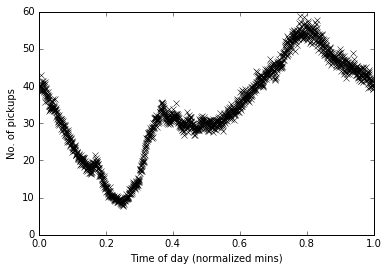

In [6]:
# Number of entries
n = len(datetime)

# Array to record taxi counts per min in day
tot_mins_in_day = 24 * 60
taxi_count = np.zeros(tot_mins_in_day)

# Iterate over each entry, extract mins
for i in range(n):
    # Split date and time, and split time into hours and mins
    hours_min = datetime[i].split()[1].split(':')
    
    # Compute the time in minutes: hr*60 + min
    mins = int(hours_min[0]) * 60 + int(hours_min[1])
    
    # Add one to the number of taxi cabs observed at this minute in the day
    taxi_count[mins] = taxi_count[mins] + 1
    
# Prepate data set
# Normalize the minutes in a day so it's on a [0, 1] scale
x = np.arange(0, tot_mins_in_day) * 1.0 / tot_mins_in_day # Multiple by 1.0 to convert to float

# Average the number of taxi trips across 31 days
y = taxi_count / 31.0

# Plot taxiCount vs. mins
plt.plot(x, y, 'xk')
plt.xlim([0, 1])
plt.xlabel('Time of day (normalized mins)')
plt.ylabel('No. of pickups')
plt.show()

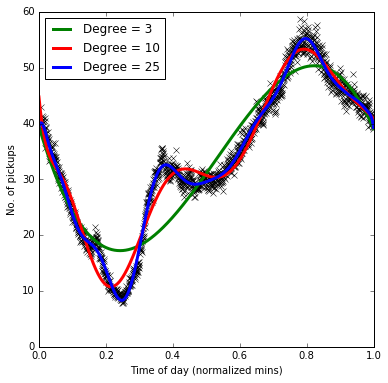

In [10]:
##
## STEP2: FIT & EXPLORE DIFFERENT POLYNOMIAL MODELS
##

# Plot data again
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x, y, 'xk')
ax.set_xlim([0, 1])
ax.set_xlabel('Time of day (normalized mins)')
ax.set_ylabel('No. of pickups')

# Plot polynomial models
ax = fit_and_plot_polynomial(ax, x, y, 3, 'g') # degree 3 polynomial
ax = fit_and_plot_polynomial(ax, x, y, 10, 'r') # degree 10 polynomial
ax = fit_and_plot_polynomial(ax, x, y, 25, 'b') # degree 25 polynomial

ax.legend(loc='upper left')
plt.show()

It looks like a 25 degree polynomial fits the entire data very well. But perhaps the degree 25 polynomial is over-fitting! To choose an appropriate degree for our polynomial model we have to do some model selection!

Best fit on test set at 26
Max R^2 score on test set 0.99
AIC is minimized at degree 28 and yields test R^2 score 0.98844
BIC is minimized at degree 21 and yields test R^2 score 0.98823
Test R^2 score is maximum at degree 27 and yields test R^2 score 0.98852


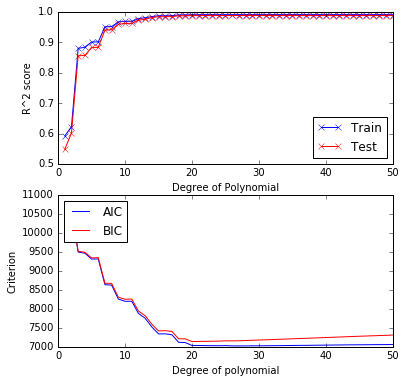

In [14]:
##
## STEP3: SPLIT TRAIN-TEST SETS, CHOOSE BEST MODEL
##

# No. of training points
n = len(x)
n_train = int(n * 2.0 / 3.0)

# Random 2/3rd train, remaining test
perm = np.random.permutation(n)
y_train = y[perm[0:n_train]]
x_train = x[perm[0:n_train]]
y_test = y[perm[n_train:]]
x_test = x[perm[n_train:]]

fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(6, 6))
ax1, best_deg, r_sq_max = fit_degrees_and_plot(ax1, x_train, y_train, x_test, y_test, 50)

# Observations from plot
print 'Best fit on test set at', best_deg
print 'Max R^2 score on test set', round(r_sq_max, 2)

ax2 = fit_degrees_aic_bic(ax2, x_train, y_train, x_test, y_test, 50)
plt.show()

Based on the BIC, AIC and test R^2 scores, it's defensible to choose a model with degree in the range of 21 to 28. 

## Challenge Problem: Advanced regression techniques
In this problem, we revisit the automobile pricing data set in Problem 1(a) and explore advanced regression techniques to build better models. 


### Part (a): Polynomial regression on multi-dimensions
In Problems 2-3, you had implemented a polynomial regression technique for data sets with a single predictor variable. How would you use a similar approach to fit a polynomial model on data sets with more than one predictor?

Reload ``dataset_1_train.txt`` and ``dataset_1_test.txt``. Fit polynomial models of degrees 2 and 3 to the training set, and evaluate the R^2 score of the fitted model on the test set. How do they compare with the test performance of a linear regression model?

**Solution:**

One can implement polynomial regression on a multi-dimensional data set by explicitly encoding higher order polynomial terms (quadratic, cubic, etc.) and fitting a multiple linear regression model to the expanded feature space. 

For example, to fit a polynomial model of degree 2 to a data set with two predictors $X_1$ and $X_2$, we include all linear and quadratic terms, resulting in the following expanded feature space:

$[X_1,\; X_2,\; X_1^2,\; X_2^2,\; X_1X_2]$

To fit a polynomial model of degree 3 to the same data set, we include all linear, quadratic and cubic terms:

$[X_1,\; X_2,\; X_1^2,\; X_2^2,\; X_1X_2,\; X_1^3,\; X_2^3,\; X_1^2X_2,\; X_1X_2^2]$

In [4]:
# Load train and test data sets
data_train = np.loadtxt('datasets/dataset_1_train.txt', delimiter=',', skiprows=1)
data_test = np.loadtxt('datasets/dataset_1_test.txt', delimiter=',', skiprows=1)

# Split predictors and response
y_train = data_train[:, -1]
x_train = data_train[:, :2]

y_test = data_test[:, -1]
x_test = data_test[:, :2]

In [35]:
# Expand features to include quadratic terms
def poly_2_expand_features(x):
    n = x.shape[0]
    d = x.shape[1]
    
    # Expanded features with both linear and quadratic terms
    x_expanded = np.zeros((n, d + d**2))
    
    # Add quadratic terms
    for i in range(d):
        for j in range(d):
            x_expanded[:, i * d + j] = np.multiply(x[:, i], x[:, j])
            
    # Add linear terms
    x_expanded[:, d**2 : d**2 + d] = x
    
    return(x_expanded)

# Expand features to include quadratic terms
def poly_3_expand_features(x):
    n = x.shape[0]
    d = x.shape[1]
    
    # Expanded features with both linear, quadratic, and cubic terms
    x_expanded = np.zeros((n, d + d**2 + d**3))
    
    # Add quadratic terms
    for i in range(d):
        for j in range(d):
            x_expanded[:, i * d + j] = np.multiply(x[:, i], x[:, j])
    
    # Add cubic terms
    for i in range(d):
        for j in range(d):
            for k in range(d):
                ind = d**2 + i * d**2 + j * d + k
                x_expanded[:, ind] = np.multiply(x[:, i], x[:, j])
                x_expanded[:, ind] = np.multiply(x_expanded[:, ind], x[:, k])
            
    # Add linear terms
    end_index = d**2 + d**3
    x_expanded[:, end_index : end_index + d] = x
    
    return(x_expanded)

# Polynomial model of degree 1
w, c = multiple_linear_regression_fit(x_train, y_train)

# Evaluate model on test data
r_squared, _ = multiple_linear_regression_score(w, c, x_test, y_test)
print 'Linear regression: R^2 score on test set =', r_squared

# Polynomial model of degree 2
x_train_expanded = poly_2_expand_features(x_train)
w, c = multiple_linear_regression_fit(x_train_expanded, y_train)

# Evaluate model on test data
x_test_expanded = poly_2_expand_features(x_test)
r_squared,_ = multiple_linear_regression_score(w, c, x_test_expanded, y_test)
print 'Polynomial regression of degree 2: R^2 score on test set =', r_squared

# Polynomial model of degree 3
x_train_expanded = poly_3_expand_features(x_train)
w, c = multiple_linear_regression_fit(x_train_expanded, y_train)

# Evaluate model on test data
x_test_expanded = poly_3_expand_features(x_test)
r_squared,_ = multiple_linear_regression_score(w, c, x_test_expanded, y_test)
print 'Polynomial regression of degree 3: R^2 score on test set =',  r_squared

Linear regression: R^2 score on test set = 0.177944627327
Polynomial regression of degree 2: R^2 score on test set = 0.272112446487
Polynomial regression of degree 3: R^2 score on test set = 0.400632382413


### Part (b): Weighted linear regression

Suppose you are told that some of the prices recorded in the training set are noisy, and you are given the list of noisy points, how would you use this information during training to fit a better regression model?

The noise level for each training point is provided in the file dataset_1_train_noise_levels.txt. A noise level 'none' indicates that the price is accurate, and a noise level 'noisy' indicates that the price is only moderately accurate. 

We want to fit a linear regression model that accounts for this new information. One way to do this is to assign different weights to each training point based on the amount of noise associated to that training point. That is, our loss function is now
$$
\sum_{i=1}^n \alpha_i\,(y_i \,-\, w^T x_i)^2
$$
where $\alpha_i$ is a number representing how much you value the contribution of the data point $x_i$.

How does the R^2 score (evaluated on the test set)  of the new linear model compare to the one fitted using plain linear regression?

**Solution:**

*Weighted Least Squared Linear Regression*: 

Assign a weight to each training point based on the noise level (higher weight for points with smaller amount of noise), and minimize a weighted least-squres loss during training.

Sample: $X \in \mathbb{R}^{n\times d}$, $Y \in \mathbb{R}^n$

Weights on individual points: $\alpha \in \mathbb{R}^n$   
(Set $\alpha_i$ to 1 for noise level 'none', to 0.25 for noise level 'noisy')

Weighted least-squares loss: $\sum_{i=1}^n \alpha_i\,(y_i \,-\, w^T x_i)^2$

Do some algebra:  $\sum_{i=1}^n \left({\sqrt{\alpha_i}}y_i \,-\, w^T {\sqrt{\alpha_i}}x_i\right)^2$

Now, let $\tilde{x}_i = {\sqrt{\alpha_i}}x_i$ and $\tilde{y}_i = {\sqrt{\alpha_i}}y_i$. That is multiply each $x_i$ and $y_i$ by $\sqrt{\alpha_i}$! Finally, we get:
$$
\sum_{i=1}^n \left(\tilde{y}_i \,-\, w^T \tilde{x}_i\right)^2
$$
and we can proceed with linear regression as usual!


In [5]:
#--------  weighted_linear_regression_fit
# Function for fitting a weighted multiple linear regression
# Input: 
#      x_train (n x d array of x-vals) 
#      y_train (n x 1 array of y-vals) 
#      alpha (n x 1 array of weightes)
# Return: 
#      w (d x 1 array of coefficients) 
#      c (float representing intercept)
def weighted_linear_regression_fit(x, y, alpha):
    
    # Change the x and y values
    # Create a diagonal matrix where the ith diagonal is 1/np.sqrt(alpha[i])
    weights = np.diag(np.sqrt(alpha))
    # Multiply the weight matrix with y-vals: 1/np.sqrt(alpha[i]) * y[i]
    y = np.dot(weights, y)
    # Multiply the weight matrix with x-vals: 1/np.sqrt(alpha[i]) * x[i, :]
    x = np.dot(weights, x)
    
    w, c = multiple_linear_regression_fit(x, y)
    
    return w, c

In [10]:
# Download noise levels
df_noise_levels = pd.read_csv('datasets/dataset_1_train_noise_levels.txt', index_col=False)

# No. of training pointa
n_train = len(df_noise_levels)

# Assign weights to instances based on noise level:
#  alpha_i = 1 if noise level is 'none'
#  alpha_i = 0.5 if noise level is 'noisy'

noise_levels = df_noise_levels['noise levels']

noise_levels[noise_levels == 'noisy'] = 0.25
noise_levels[noise_levels == 'none'] = 1.
alpha = noise_levels.values
        
# Fit weighted model training set
w, c = weighted_linear_regression_fit(x_train, y_train, alpha.astype('float64'))

# Evaluate weigthed model on testing set
r_squared, _ = multiple_linear_regression_score(w, c, x_test, y_test)
print 'Weighted linear regression: R^2 score on test set =', r_squared


# Fit unweighted model training set
w, c = multiple_linear_regression_fit(x_train, y_train)

# Evaluate unweigthed model on testing set
r_squared,_ = multiple_linear_regression_score(w, c, x_test, y_test)
print 'Unweighted linear regression: R^2 score on test set =', r_squared

Weighted linear regression: R^2 score on test set = 0.536746066269
Unweighted linear regression: R^2 score on test set = 0.177944627327
